In [62]:
file_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/train/90degreebyreflex.png'

In [63]:
def track_progress_over_deformation():
    a = []
    for deform in range(11):
        result = netShapeM.G_S(I, deform/10)
        a.append(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8))
    x = np.hstack(tuple(a))
    return x

In [64]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [65]:
import torch
from PIL import Image
import numpy as np
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
# SMGAN
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32
opts.load_GS_name = '/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/maple-GS-iccv.ckpt'

# SketchModule
opts.GB_nlayers = 6
opts.DB_nlayers = 5
opts.GB_nf = 32
opts.DB_nf = 32
opts.load_GB_name = '/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/GB-iccv.ckpt'

# train 
opts.gpu = True
opts.step1_epochs = 30
opts.step2_epochs = 40
opts.step3_epochs = 80
opts.step4_epochs = 10
opts.batchsize = 16
opts.Straining_num = 2560
opts.scale_num = 4
opts.Sanglejitter = True
opts.subimg_size = 256
opts.glyph_preserve = False
opts.text_datasize = 708
opts.text_path = '../data/rawtext/yaheiB/train'

# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'


# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
    netSketch.cuda()

netSketch.load_state_dict(torch.load(opts.load_GB_name))
netSketch.eval()

netShapeM.G_S.load_state_dict(torch.load(opts.load_GS_name))
netShapeM.G_S.eval()


I = load_image(file_to_test)
I = to_var(I)#[:,:,32:288,32:288])
I[:,0:1] = gaussian(I[:,0:1], stddev=0.2)
result = netShapeM.G_S(I, 0.2)

a = track_progress_over_deformation()

# Image.fromarray(a)

--- create model ---


In [66]:
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32
opts.load_GS_name = '/home/abhirag/cv_project/experiment/save/maple-GS.ckpt'

# SketchModule
opts.GB_nlayers = 8
opts.DB_nlayers = 5
opts.GB_nf = 128
opts.DB_nf = 64
opts.load_GB_name = '/home/abhirag/cv_project/experiment/save/experiment12/GB.ckpt4'

# train 
opts.gpu = True
opts.step1_epochs = 30
opts.step2_epochs = 40
opts.step3_epochs = 80
opts.step4_epochs = 10
opts.batchsize = 16
opts.Straining_num = 2560
opts.scale_num = 4
opts.Sanglejitter = True
opts.subimg_size = 256
opts.glyph_preserve = False
opts.text_datasize = 708
opts.text_path = '../data/rawtext/yaheiB/train'

# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'


# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
    netSketch.cuda()

netSketch.load_state_dict(torch.load(opts.load_GB_name))
netSketch.eval()

netShapeM.G_S.load_state_dict(torch.load(opts.load_GS_name))
netShapeM.G_S.eval()

I = load_image(file_to_test)
I = to_var(I)#[:,:,32:288,32:288])
I[:,0:1] = gaussian(I[:,0:1], stddev=0.2)



b = track_progress_over_deformation()
# Image.fromarray(b)

--- create model ---


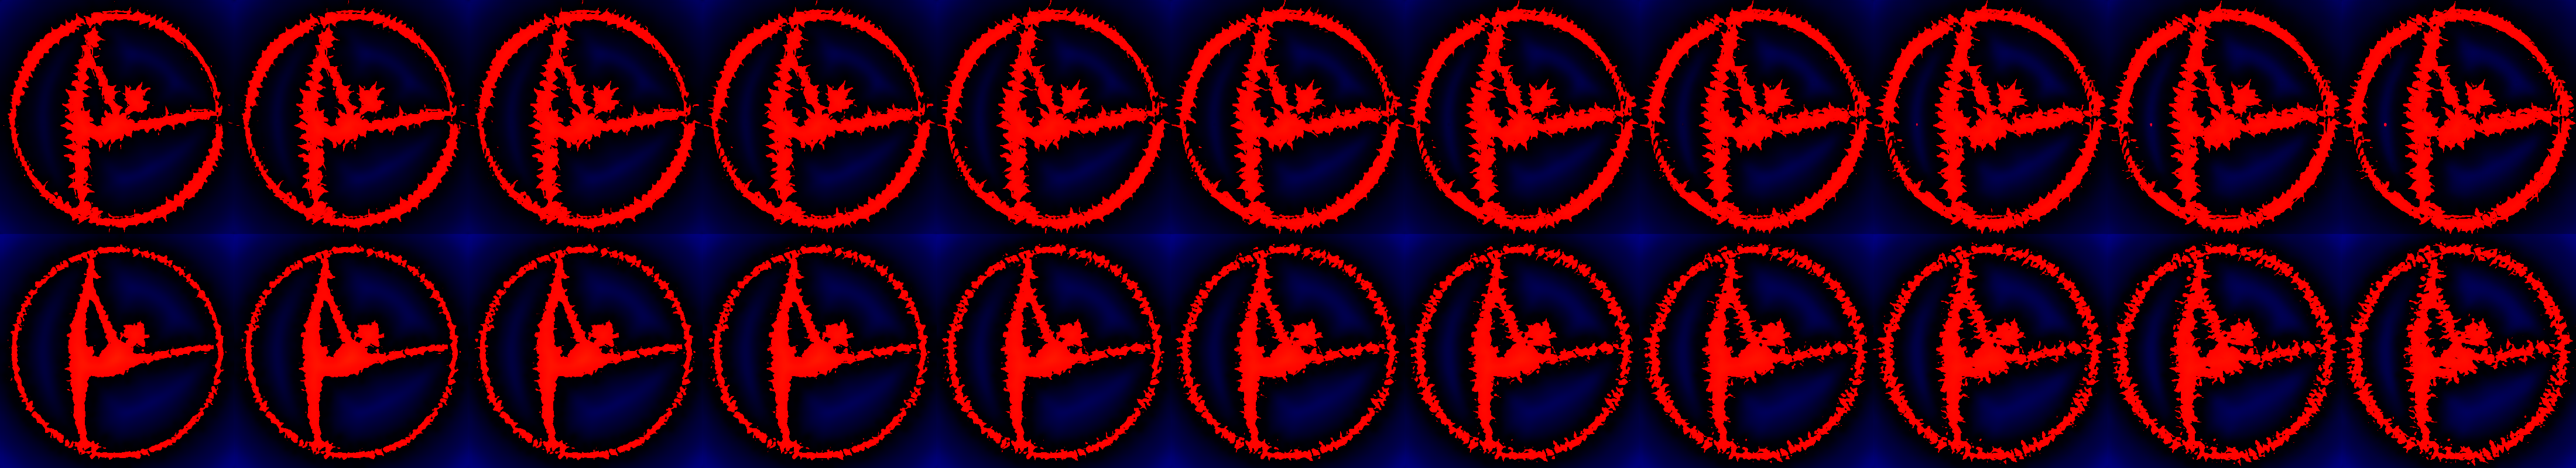

In [67]:
Image.fromarray(np.vstack((a, b)))